# Upload to AWS S3

https://realpython.com/python-boto3-aws-s3/

In [1]:
!pip install boto3

  Using cached https://files.pythonhosted.org/packages/ea/43/4b4a1b26eb03a429a4c37ca7fdf369d938bd60018fc194e94b8379b0c77c/s3transfer-0.3.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/07/cb/5f001272b6faeb23c1c9e0acc04d48eaaf5c862c17709d20e3469c6e0139/jmespath-0.10.0-py2.py3-none-any.whl
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import boto3

# Let's use Amazon S3
s3 = boto3.resource('s3')

In [2]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

aiworkflow
diigo-knowledge-graph
matlab2020b
self-driving-dataset
zappa-3czvv42gy
zappa-54ckqvw8t
zappa-d5a55jhy6
zappa-pn076q184
zappa-ri494sdm2
zappa-w6lpl9cl0


In [3]:
aibucket = s3.Bucket('aiworkflow')

for file in aibucket.objects.all():
    print(file.key)

mg_275.png
2021-03-06-1_img_276.png
2021-03-06-1_img_277.png
2021-03-06-1_img_278.png
2021-03-06-1_img_279.png
2021-03-06-1_img_28.png
2021-03-06-1_img_280.png
2021-03-06-1_img_281.png
2021-03-06-1_img_282.png
2021-03-06-1_img_283.png
2021-03-06-1_img_284.png
2021-03-06-1_img_285.png
2021-03-06-1_img_286.png
2021-03-06-1_img_287.png
2021-03-06-1_img_288.png
2021-03-06-1_img_289.png
2021-03-06-1_img_29.png
2021-03-06-1_img_290.png
2021-03-06-1_img_291.png
2021-03-06-1_img_292.png
2021-03-06-1_img_293.png
2021-03-06-1_img_294.png
2021-03-06-1_img_295.png
2021-03-06-1_img_296.png
2021-03-06-1_img_297.png
2021-03-06-1_img_298.png
2021-03-06-1_img_299.png
2021-03-06-1_img_3.png
2021-03-06-1_img_30.png
2021-03-06-1_img_300.png
2021-03-06-1_img_301.png
2021-03-06-1_img_302.png
2021-03-06-1_img_303.png
2021-03-06-1_img_304.png
2021-03-06-1_img_305.png
2021-03-06-1_img_306.png
2021-03-06-1_img_307.png
2021-03-06-1_img_308.png
2021-03-06-1_img_309.png
2021-03-06-1_img_31.png
2021-03-06-1_img_310

## Upload a file to an S3 bucket

    :param file_name: File to upload
    :param bucket: Bucket to upload to
    :param object_name: S3 object name. If not specified then file_name is used
    
https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-uploading-files.html

![map](../img/nfs_final_location.png)

In [4]:
training_dataset = "2021-03-11-2"
img = "img_0.png"
training_data_0 = "../samples/"+training_dataset+"/"+img
training_data_0

'../samples/2021-03-11-2/img_0.png'

In [5]:
import os
training_files = os.listdir("../samples/"+training_dataset)
training_files[0:5]

['data.csv', 'img_0.png', 'img_1.png', 'img_10.png', 'img_100.png']

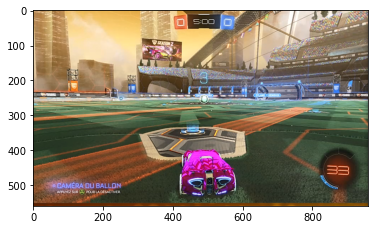

In [10]:
import cv2
import matplotlib.pyplot as plt
img2 = cv2.imread(training_data_0)
# img2
plt.imshow(img2)

In [11]:
s3_client = boto3.client('s3')
file_name = training_dataset+"_"+img
s3_bucket = "aiworkflow"
# s3_client.upload_file(file_name, bucket, object_name)

In [13]:
s3_client.upload_file(training_data_0, s3_bucket, file_name)

In [14]:
aibucket = s3.Bucket('aiworkflow')

file_keys = [file.key for file in aibucket.objects.all()]
file_keys[-1]

'2021-03-11-2_img_0.png'

## Download File

https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-download-file.html

In [15]:
import boto3
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-download-file.html
s3_client = boto3.client('s3')

file_name = training_dataset+"_"+img
s3_bucket = "aiworkflow"
# s3.download_file('BUCKET_NAME', 'OBJECT_NAME', 'FILE_NAME')
s3_client.download_file(s3_bucket, file_name,file_name)

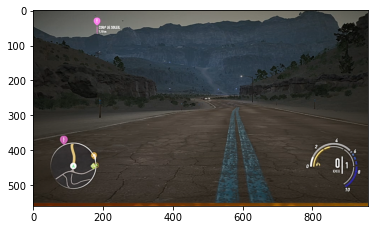

In [16]:
import cv2
import matplotlib.pyplot as plt
img3 = cv2.imread(file_name)
plt.imshow(img3)

## Access public S3 bucket

Grant public access the S3 bucket

https://aws.amazon.com/fr/premiumsupport/knowledge-center/read-access-objects-s3-bucket/
```
{
    "Version": "2008-10-17",
    "Statement": [
        {
            "Sid": "AllowPublicRead",
            "Effect": "Allow",
            "Principal": {
                "AWS": "*"
            },
            "Action": "s3:GetObject",
            "Resource": "arn:aws:s3:::self-driving-dataset/*"
        }
    ]
}
```

In [17]:
DATA_URL_ROOT = "https://aiworkflow.s3.eu-west-3.amazonaws.com/"
training_dataset = "2021-03-11-2"
selected_frame = "img_0.png"

In [18]:
import urllib
import numpy as np
import cv2
def load_image(url):
    with urllib.request.urlopen(url) as response:
        image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = image[:, :, [2, 1, 0]] # BGR -> RGB
    return image

Source : https://github.com/streamlit/demo-self-driving/blob/230245391f2dda0cb464008195a470751c01770b/streamlit_app.py#L208

In [19]:
import os
image_url = os.path.join(DATA_URL_ROOT,training_dataset+"_"+selected_frame)
# image_url
image = load_image(image_url)

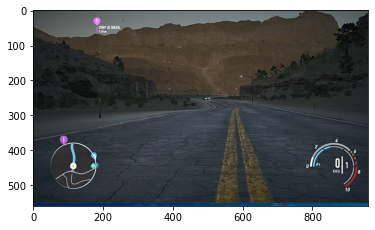

In [20]:
import matplotlib.pyplot as plt
plt.imshow(image)

## Manage S3 bucket

Before adding this new training dataset, the bucket was already quite full with rocket league pictures

![s3](../img/s3_aiworkflow.png)

Simple python script to calculate size of S3 buckets:

https://gist.github.com/robinkraft/2667939

In [29]:
total_size = 0
aibucket = s3.Bucket('aiworkflow')

for object in aibucket.objects.all():
  total_size += object.size
#   print(object.size)
print(total_size)

1692841813


In [30]:
sum([object.size for object in boto3.resource('s3').Bucket('aiworkflow').objects.all()])

1692841813

## Delete Object in S3 bucket
https://realpython.com/python-boto3-aws-s3/#deleting-an-object

In [21]:
aibucket = s3.Bucket('aiworkflow')

file_keys = [file.key for file in aibucket.objects.all()]
file_keys[0]

'2021-03-06-1_data.csv'

In [22]:
len(file_keys)

2214

In [25]:
import re
old_training_dataset = "2021-03-06-1"
r = re.compile(old_training_dataset)
oldlist = list(filter(r.match, file_keys))

In [26]:
len(oldlist)

1673

In [27]:
oldlist[0],oldlist[-1]

('2021-03-06-1_data.csv', '2021-03-06-1_img_999.png')

In [31]:
# s3_resource.Object(bucket_name, file_name).delete()
s3.Object('aiworkflow',oldlist[0])

s3.Object(bucket_name='aiworkflow', key='2021-03-06-1_data.csv')

In [32]:
s3.Object('aiworkflow',oldlist[0]).delete()

{'ResponseMetadata': {'RequestId': '8XNEYK6MP3D8C4B6',
  'HostId': 'W1XkdsT0ih/Qk9YqKpLpRb1cUr4eeNkhFxmQqcj9VZD2A0GGS2DU5usJBHbwk3QFBtewQn+R+d4=',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amz-id-2': 'W1XkdsT0ih/Qk9YqKpLpRb1cUr4eeNkhFxmQqcj9VZD2A0GGS2DU5usJBHbwk3QFBtewQn+R+d4=',
   'x-amz-request-id': '8XNEYK6MP3D8C4B6',
   'date': 'Sat, 03 Apr 2021 09:18:35 GMT',
   'server': 'AmazonS3'},
  'RetryAttempts': 0}}

In [37]:
len([file.key for file in aibucket.objects.all()])

2213

In [38]:
for file in oldlist:
    s3.Object('aiworkflow',file).delete()

In [39]:
len([file.key for file in aibucket.objects.all()])

541

In [40]:
sum([object.size for object in aibucket.objects.all()])

295024968